# Clustering and Analysis for `DISMOUNT`

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = '3'

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
bike = pd.read_csv('dfb_bound.csv')

In [4]:
df = bike[bike.MU_DISMOUNT != 0]

In [5]:
bike_features = [ # 'score_weighted_by_main', 'score_weighted_by_sub',
       'SU_DISMOUNT', 'SU_bicycle', 'SU_CYCLEWAY_CLASS',
       'SU_CYCLEWAY_LANE_TYPE', 'SU_foot', 'SU_highway', 'SU_ALLEY',
       'SU_width', 'SU_lit', 'SU_maxspeed', 'SU_segregated', 'SU_sidewalk',
       'SU_PARKING_SUBTAGS', 'SU_TAG_crossing', 'SU_EDSA_accident_component',
       'SU_motor_vehicle', 'SU_FROM_IMAGES_cycling_lane_coverage',
       'SU_FROM_IMAGES_greenery_ratio', 'SU_FROM_IMAGES_has_bicycle',
       'SU_FROM_IMAGES_road_condition', ]

In [6]:
X = df[bike_features]
X = X.drop(columns=X.columns[X.nunique() == 1].tolist())

In [7]:
X.columns

Index(['SU_lit', 'SU_TAG_crossing', 'SU_FROM_IMAGES_greenery_ratio'], dtype='object')

In [8]:
def find_optimal_kmeans(X, max_k=10, title=''):
    inertias = []
    silhouette_scores = []

    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))

    # Plot the Elbow curve
    plt.figure(figsize=(10, 5))
    plt.plot(range(2, max_k + 1), inertias, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title(f'Elbow Method for Optimal k {title}')
    plt.show()

    # Plot the Silhouette Scores
    plt.figure(figsize=(10, 5))
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o', color='orange')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title(f'Silhouette Score for Optimal k {title}')
    plt.show()

    # return inertias, silhouette_scores

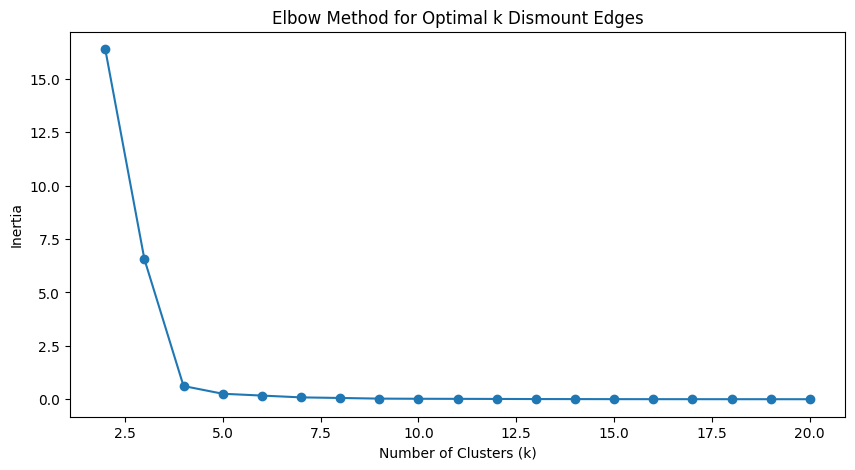

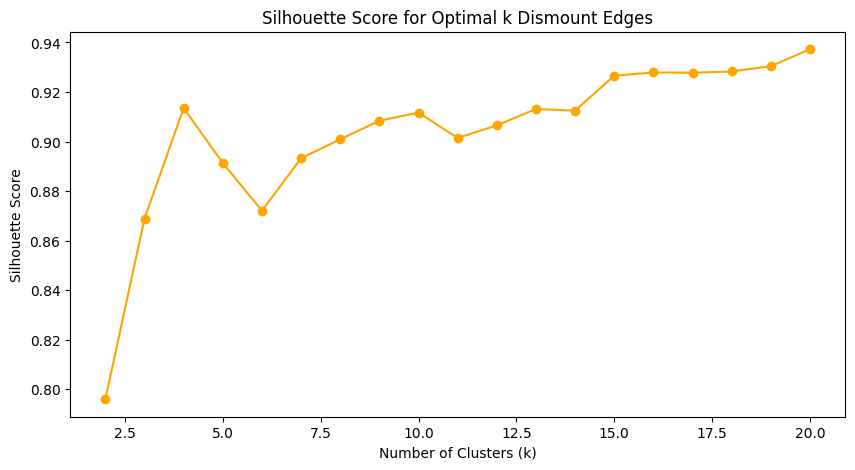

In [9]:
find_optimal_kmeans(X, 20, 'Dismount Edges')